In [2]:
import pandas as pd 
import numpy as np
import seaborn as sn
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load Data In
company = 'AAPL'
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022, 11, 1)
data = web.DataReader(company, 'yahoo', start, end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.087082
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.670715
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.305794
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.581635
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.700089
...,...,...,...,...,...,...
2022-10-26,151.990005,148.039993,150.960007,149.350006,88194300.0,149.350006
2022-10-27,149.050003,144.130005,148.070007,144.800003,109180200.0,144.800003
2022-10-28,157.500000,147.820007,148.199997,155.740005,164762400.0,155.740005


In [4]:
# Add features
from ta import add_all_ta_features
from ta.utils import dropna
data = add_all_ta_features(
    data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
data

c:\Users\neilp\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\neilp\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.087082,-3.242589e+07,143301900.0,-0.226277,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129.410004,-12.827835,0.000000,0.000000
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.670715,2.215975e+07,240966800.0,0.091962,1.562629e+08,...,0.098538,0.019708,0.078830,-2.601860,-0.520372,-2.081488,129.654488,1.236373,1.228793,1.236373
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.305794,-1.183160e+08,85878800.0,-0.298737,3.623432e+07,...,-0.097142,-0.003662,-0.093480,-1.326245,-0.681547,-0.644698,128.824524,-3.366152,-3.424112,-2.171397
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.581635,-5.001167e+07,195457000.0,-0.098909,9.868338e+07,...,0.017009,0.000472,0.016537,-2.950657,-1.135369,-1.815289,129.190563,3.412322,3.355394,1.166830
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.700089,4.320101e+06,300615200.0,0.007073,1.015614e+08,...,0.175563,0.035490,0.140073,-4.507211,-1.809737,-2.697474,129.739491,0.863126,0.859423,2.040027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26,151.990005,148.039993,150.960007,149.350006,88194300.0,149.350006,1.622645e+09,-114830200.0,0.030312,4.034510e+07,...,-0.513257,-1.625692,1.112436,-4.050256,-3.116726,-0.933530,148.126245,-1.962709,-1.982226,15.408393
2022-10-27,149.050003,144.130005,148.070007,144.800003,109180200.0,144.800003,1.543200e+09,-224010400.0,0.014643,-3.638567e+07,...,-0.557343,-1.412023,0.854679,-1.238763,-2.741133,1.502370,148.089707,-3.046537,-3.093908,11.892434
2022-10-28,157.500000,147.820007,148.199997,155.740005,164762400.0,155.740005,1.648049e+09,-59248000.0,0.138480,2.263124e+08,...,0.009010,-1.127816,1.136826,5.610461,-1.070814,6.681275,149.180950,7.555250,7.283448,20.346187


In [5]:
data.drop(columns=['volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui',  'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi',  'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b',
       'trend_stc', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_cci',
       'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b', 'trend_aroon_up',
       'trend_aroon_down', 'trend_aroon_ind', 'momentum_stoch_rsi',
       'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d', 'momentum_tsi',
       'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_ao', 'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal',
       'momentum_ppo_hist', 'momentum_pvo', 'momentum_pvo_signal',
       'momentum_pvo_hist', 'momentum_kama', 'High', 'Low', 'Open', 'trend_psar_up_indicator', 'trend_psar_down_indicator', 'volatility_bbm', 'volume_adi','others_dr', 'others_cr', 'trend_psar_down', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [6]:
data

,Close,trend_macd,trend_mass_index,trend_psar_up,momentum_rsi,others_dlr
Date,,,,,,
2021-01-04,129.410004,0.000000,1.000000,126.379997,100.000000,0.000000
2021-01-05,131.009995,0.127635,1.915569,126.379997,100.000000,1.228793
2021-01-06,126.599998,-0.125616,2.810212,126.379997,25.199812,-3.424112
2021-01-07,130.919998,0.022015,3.670344,126.379997,58.191200,3.355394
2021-01-08,132.050003,0.227573,4.472288,126.379997,62.811667,0.859423
...,...,...,...,...,...,...
2022-10-26,149.350006,-0.754778,25.079607,139.239543,53.288518,-1.982226
2022-10-27,144.800003,-0.818679,25.043020,140.564589,46.811996,-3.093908
2022-10-28,155.740005,0.013293,25.261354,141.757131,59.543661,7.283448


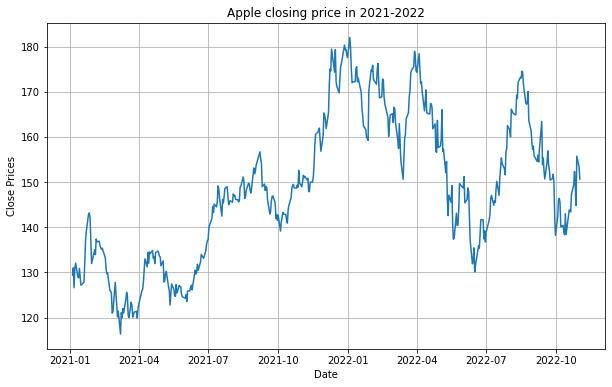

In [7]:
# Apple Close Prices
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Apple closing price in 2021-2022')
plt.show()

In [8]:
# Scale Features and Output
# data.index.name = 'Date'
# close = data['Close']
# data.drop(['Close'], axis=1, inplace=True)
data.reset_index(inplace=True)


In [9]:
# Split Datasets
min_date = data['Date'].min()
max_date = data['Date'].max()



train_percent = .75
time_between = max_date - min_date
train_cutoff = min_date + train_percent*time_between
train_cutoff


Timestamp('2022-05-18 12:00:00')

In [10]:

train = data[data['Date'] <= train_cutoff]
test = data[data['Date']> train_cutoff]

close_train = train['Close']
close_test = test['Close']

train.drop(['Close', 'Date'],axis=1, inplace=True)
test.drop(['Close', 'Date'], axis=1, inplace=True)


c:\Users\neilp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train, close_train)

pred = model.predict(test)

In [12]:
from sklearn.metrics import mean_squared_error

mean_squared_error(close_test, pred)

56.09670402303912

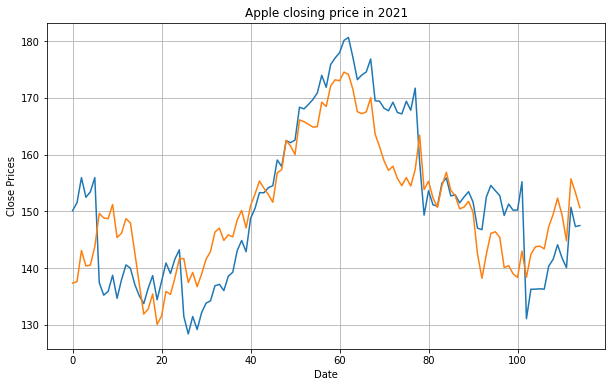

In [13]:
# Apple Close Prices
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(pred)
plt.plot(close_test.reset_index().drop(['index'], axis=1))
plt.title('Apple closing price in 2021')
plt.show()

In [14]:
# Save model
import pickle
pickle.dump(model, open('linear_baseline', 'wb'))

TypeError: file must have a 'write' attribute